# 품질 관리 직무

    - 품질 경영(QM)
    - 품질 관리(QC) -> 품질 검사
        - 특히 공정에서 이루어 지는 공정검사 ) 
             - 측정 -> 측정오차 리스크 있음------------------------------> 머신 비전으로 해결 : 주로 영상처리와 컴퓨터 비전 기술을 상요해 형태 분석과 측정을 한다. 
             - 육안검사 -> 작업자 실수 리스크----------------------------> 머신 비전으로 해결
             - 기록 -> 기록 실수 리스크---------------------------------->공정 자동화로 해결
             - 검사 기기 세팅 -> 잘못된 기기 세팅, 검사 기기 오동작--------> 공정 자동화로 해결
            
    - 품질 보증(QA)

# 딥러닝
(https://www.tensorflow.org/tutorials/keras/classification?hl=ko 참고)
 : 빅데이터 -> End-to-end 딥러닝 모델 -> Grountruth label 을 할 때는 입출력이 잘 정의 되어있고, 학습할 데이터가 충분하다는 가정 하에 딥러닝을 진행 한 것이다. 
 
 하지만, 현실을 이렇지 않다. 
 공정 검사에서 
 ### 딥러닝 적용의 어려움
 - 빠른 변화
     - 빠른 시장의 변화 : 시장의 변화에 맞추어 다품종 소량생산이 많아지면서, 신규 제품을 취급하는 일이 늘어남
     - 고객의 변화 : 고객의 요구사항은 수시로 변할 수 있다. 
     - 환경의 변화 : 제품 생산 환경, 공정 검사 Software 개발 환경은 예상치 못하게 변화 할 수 있음
 - 양산 초기 품질의 확보
     - 새로운 제품을 시장에 출시할 때에는 초기 출시 단계에서 물량을 확보하는 것이 중요
     - 초기 물량 확보를 위해서는 초기 시작 제품의 품질 Issue를 해결하여 수율을 확보하는 것이 핵심
     - 초기 품질을 확보하는 것 뿐 아니라, 초기 출하 제품의 품질을 확보하는 것 역시 매우 중요함 
 - 데이터 확보의 어려움
     - 양산 다계에 있는 제품의 경우, 양산 중이 ㄴ공정에서 필요한 데이터를 확보하기 쉽지 않음
     - 불량률이 0.1% 이하로 매우 낮은 제품군의 경우에는 다양한 불량품 데이터를 제공받기 매우 어려움
     - 수 많은 양산 데이터가 있더라도 잘 분류된 정답 label을 포함한 질 좋은 데이터는 확보가 어려움
     
### 딥러닝 적용의 해결방법 및 근거
- Domain Knowledge의 활용하여
    - End-to-end문제가 아닌 할 수 있는 최대한의 전처리는 모두 다 해주고, 최대한 학습하기 좋은 형태로 데이터를 가공, 
    - 출력도 최종 출력을 한번에 뽑아내려 하지 말고, 중간의 출력에 Domain Knowledge를 이용한 알고리즘을 한 번 더 적용한다. 
    - 딥러닝의 관심적인 모델이 아닌, 데이터와 현상에 기반한 적합한 well-defined모델을 이용하여 문제를 해결한다.
    - 무조건 많은 데이터가 아닌 섬세하게 확보한 적정 수준의 데이터를 이용하여 목적을 달성 할 수 있다. 

# 공정 분석 딥러닝 실무
#### 그래서 이번 학습에서는 가상고객 한 분을 설정해서, 그 가상 고객과 커뮤니케이션하면서 공동으로 원하는 무언가를 만들어보고자 한다. 

## 1. 딥러닝 실무 개요
#### 1) 문제 정의하기 2) 스펙 결정하기  3) 실행 가능성 확인하기  4) 알고리즘 설계하기  5) 데이터 정리하기  6) 모델 학습 및 검증하기 7) 프로그램 전달하기
## 2. 가상의 고객 설정
: 고객이란 누구를 말하는 걸까? 누구를 위해 일하느냐는 매우 중요하다. 고객의 '요구 사항'을 만족해야 하기 때문이다. 

가상고객 
이름 : 정현정 
특징 : - 원단 사업부 제조 공정 엔지니어
        - 제조 통계에 익숙하며, 인공지능 도입은 처음
        - 원단에 대한 도메인 지식이 뛰어남
        - 제조 공정에 자주 드나들어 연락이 어려움
## 3. 데이터셋
: 최근 aitex 사 에서 공개한 Fabric Image Dataset을 사용한다. 데이터셋을 상황에 맞게 조작한 것을 사용할 것이다. http://www.aitex.es/afid
** 압출 풀 시 : https://www.fonedog.com/ko/powermymac/how-to-open-7z-files-on-mac.html 참고

출처  : AFID: a  public fabric image database for defect detection.
Javier Silvestre-Blanes, Teresa Albero-Albero, Ignacio Miralles, Rubén Pérez-Llorens, Jorge Moreno
AUTEX Research Journal, No. 4, 2019   

In [1]:
#!pip install opencv-python

In [2]:
import cv2 #computer vision library
import os
import glob
import shutil
import random
import string

import numpy as np

In [3]:
PATH_DEFECT = '/Users/jeonghyeonjeong/for github/머신러닝_데이터분석A-Z_패스트캠퍼스/의류직물 분량 검출을 위한 이미지 분석/dataset/Defect_images/'
PATH_MASK = '/Users/jeonghyeonjeong/for github/머신러닝_데이터분석A-Z_패스트캠퍼스/의류직물 분량 검출을 위한 이미지 분석/dataset/Mask_images/'
PATH_NODEFECT = '/Users/jeonghyeonjeong/for github/머신러닝_데이터분석A-Z_패스트캠퍼스/의류직물 분량 검출을 위한 이미지 분석/dataset/NODefect_images/'

In [4]:
random.seed(0)#동일한 결과를 얻을 수 있게 random.seed를 고정

defect_list = glob.glob(PATH_DEFECT + '*.png')
#if not defect_list :
    #print('defect_list is empty!')
mask_list = glob.glob(PATH_MASK + '*.png')
pass_list = glob.glob(PATH_NODEFECT + '**/*.png')

#defect, mask 데이터를 쌍으로 묶어주는 작업을 진행
new_defect_list = list()
new_mask_list = list()
for defect in defect_list:
    num = defect.split('/')[-1].split('_')[0]
    for mask in mask_list:
        num_mask = mask.split('/')[-1].split('_')[0]
        if num == num_mask:
            new_defect_list.append(defect)
            new_mask_list.append(mask)
            break
defect_list = new_defect_list
mask_list = new_mask_list

### 첫 발송 데이터 생성

In [5]:
#set을 진행하면서 여러번 데이터를 취득하게 될 텐데 데이터를 얻는 과정을 나누어보면
#The first dataset given
if os.path.exists('dataset/1') is False:
    os.mkdir('dataset/1')
for file_name in pass_list + defect_list:
    if random.randint(0, 9) < 2:
        barcode = ''.join(random.choices(string.ascii_letters + string.digits, k=16))
        shutil.copy2(file_name, 'dataset/1/' + barcode + '.png')

### 두 번째 데이터 생생

In [6]:
#The second dataset
if os.path.exists('dataset/2') is False: 
    os.mkdir('dataset/2')
if os.path.exists('dataset/2/OK') is False:
    os.mkdir('dataset/2/OK')
if os.path.exists('dataset/2/FAIL') is False:
    os.mkdir('dataset/2/FAIL')
    
idx = 0

for file_name in pass_list: #pass_list = glob.glob(PATH_NODEFECT + '*.png')의 이미지를 하나씩 
    img = cv2.imread(file_name)
    height, width, _ = img.shape
    step = height//2
    
    for i in range(width//step):
        w = i * step
        if w<width - height and random.randint(0, 9) <2:
            patch = img[:, w:w+height, :]
            cv2.imwrite('dataset/2/OK/%04d.png' % idx,patch)
            idx += 1
            
patch_list = list()
for item in zip(defect_list, mask_list): #그 다음은 defect_list와 mask_list 
    defect, mask =item
    
    img_d = cv2.imread(defect)
    img_m = cv2.imread(mask)
    
    height, width, _ = img_d.shape
    step = height // 2
    
    for i in range(width // step):
        w = i * step
        if w < width - height:
            patch = img_d[:, w:w+height, :]
            patch_d = img_m[:, w:w+height, :]
            if patch_d.sum() > 0:
                patch_list.append(patch)

random.shuffle(patch_list)
patch_list_fraction = patch_list[:len(patch_list)//3]
for idx, patch in enumerate(patch_list_fraction):
    cv2.imwrite('dataset/2/FAIL/%04d.png' % idx, patch)

### 세 번째 데이터 생성

In [7]:
# The third dataset
if os.path.exists('dataset/3') is False:
    os.mkdir('dataset/3')
if os.path.exists('dataset/3/OK') is False:
    os.mkdir('dataset/3/OK')
if os.path.exists('dataset/3/FAIL') is False:
    os.mkdir('dataset/3/FAIL')
if os.path.exists('dataset/3/MASK') is False:
    os.mkdir('dataset/3/MASK')
idx = 0
for file_name in pass_list:
    img = cv2.imread(file_name)
    height, width, _ = img.shape
    step = height // 2

    for i in range(width // step):
        w = i * step
        if w < width - height and random.randint(0, 9) < 3:
            patch = img[:, w:w+height, :]
            cv2.imwrite('dataset/3/OK/%04d.png' % idx, patch)
            idx += 1 

patch_pair_list = list()
for item in zip(defect_list, mask_list):
    defect, mask = item

    img_d = cv2.imread(defect)
    img_m = cv2.imread(mask)

    height, width, _ = img_d.shape
    step = height // 2
    for i in range(width // step):
        w = i * step
        if w < width - height:
            patch = img_d[:, w:w+height, :]
            patch_d = img_m[:, w:w+height, :]

            if patch_d.sum() > 0:
                patch_pair_list.append((patch, patch_d))

random.shuffle(patch_pair_list)
for idx, pair in enumerate(patch_pair_list):
    patch, patch_d = pair
    cv2.imwrite('dataset/3/FAIL/%04d.png' % idx, patch)
    cv2.imwrite('dataset/3/MASK/%04d.png' % idx, patch_d)

### 실전 데이터 생성

In [8]:
# The test dataset
if os.path.exists('dataset/input_data') is False:
    os.mkdir('dataset/input_data')
if os.path.exists('dataset/output_csv') is False:
    os.mkdir('dataset/output_csv')
    
idx = 0
for file_name in pass_list:
    img = cv2.imread(file_name)
    height, width, _ = img.shape
    step = height // 2

    for i in range(width // step):
        w = i * step
        if w < width - height and random.randint(0, 9) < 5:
            patch = img[:, w:w+height, :]
            cv2.imwrite('dataset/input_data/ok_%04d.png' % idx, patch)
            idx += 1 

patch_pair_list = list()
for item in zip(defect_list, mask_list):
    defect, mask = item

    img_d = cv2.imread(defect)
    img_m = cv2.imread(mask)

    height, width, _ = img_d.shape
    step = height // 2
    for i in range(width // step):
        w = i * step
        if w < width - height:
            patch = img_d[:, w:w+height, :]
            patch_d = img_m[:, w:w+height, :]

            if patch_d.sum() > 0:
                patch_pair_list.append((patch, patch_d))

random.shuffle(patch_pair_list)
for idx, pair in enumerate(patch_pair_list):
    patch, patch_d = pair
    cv2.imwrite('dataset/input_data/fail_%04d.png' % idx, patch)


## 4. 요구 사항 분석(Requirements analysis)
: 요구 사항 분석은 매우 중요하며, 경영학과 소프트웨어 공학에서 깊게 다룬다. 
### 고객의 요구사항
   고객 요구사항을 끌어내는 것(Requirements gathering)의 실패 사례)
        - A : 정현정님 안녕하세요? 제가 어떤 것을 해 드리면 되나요?
        - C : 안녕하세요, 인공지능 전문가라고 하셨죠? 뭘 해 주실 수 있나요?
        - A : 어.. 영상 분석이니까 CNN으로 Classification을 해드릴 수 있을 것 같은데요..
        - C : 영상이 아니라 사진이고요, CNN?? 클래시..뭐요?
   성공 사례)
       고객의 목소리(VOC; Voice of Customer)
       - C : 직조를 하고 나면 검사 공정에서 사진을 찍는데, 지금은 사람이 보고 거릅니다. 
           공정 검사가 자동으로 됐으면 좋겠습니다. 
           인공지능이 알아서 불량인지 정상인지 엑셀에 써주면 좋겠습니다. 
           왜 불량인지도 알면 좋겠는데, 이건 아무래도 어렵겠죠?

## 5. 결과물로 이야기하라. 
: 고객에게 완벽한 결과물만 보여줘야 하는 것이 아니다. 결과물 예시를 프로토타입하고, 중간 결과를 보여주어라. **눈에 보이는 실체를 가지고 이야기해야 아이디어가 나오고, 개선점을 찾을 수 있다.**
        - A : 이미지 분석으로는 이렇게 검출, 분할, 분류를 할 수 있습니다. *용어도 쉽게 바꿈*
        - C : 좋습니다. 불량인지 아닌지 분류만 해 줘도 유용하겠네요. 
        
## *. 최종 업무 노트 현황
        A : 최종으로는 ,Classifier학습하기와 Excel입력 자동화 하기를 하면 되겠다. 
 
## 6. 상세 스펙 결정하기(Specification)
: 개발 할 때 어떻게 동작해야 하는지 그것을 상세하게 나열한 것을 말한다.  스펙을 결정하고 문서화하는 것은  매우 중요하다. 스펙은 업무 산출물의 유효성을 결정하기 때문이다. 
- 지원 환경
- 프로그램 동작 속도
- 알고리즘 성능(정확도, 정밀도, 재현성..)
    : 무조건 정확도만 높은 것 보다는, 재현율과 정밀성 사이에서 Trade-off를 따져 보아야 한다.
    **정밀도** : 검출한 것 중에 얼마나 많이 불량인가?
    **재현성** : 전체에서 불량을 얼마나 많이 찾았는가?
- 검출 가능한 최소 불량 영역 크기 등

        
## *. 최종 업무 노트 현황
        A : - Classifier학습하기
             - Excel 입력 자동화하기
             - Test용 프로그램 작성하기
             - 미검이 없도록 알고리즘 튜닝
             - GPU환경에서 실시간 동작 확인

## 7. 실행 가능성 확인하기
### 데이터 요청
- 여기선 앞에서 dataset/1 에 저장해 둔 데이터를 요청답안으로 받았다고 생각하고 이용한다. 

In [9]:
import glob
import os
import tensorflow as tf
import cv2

from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

### 하이퍼파라미터

In [10]:
EPOCHS = 20 #이정도로 학습 시작

DATASET_PATH = 'dataset/2/'
DATASET_OK_PATTERN = DATASET_PATH + 'OK/*.png'  #정상
DATASET_FAIL_PATTERN = DATASET_PATH + 'FAIL/*.png' #불량

RESULT_SAVE_PATH = 'results/' #알고리즘 결과 

### 데이터 셋 불러오기

In [11]:
def preprocess(file_name) : #파일 이름으로 접근 했을 때 파일 이름으로부터 이미지를 불러오고, 그 png로 저장된 이미지를 256*256*3으로 decoding해주는 함수
    img = tf.io.read_file(file_name)
    img = tf.image.decode_png(img)
    return tf.image.convert_image_dtype(img, tf.float32) #convert_image_dtype이란 함수를 사용하면 읽어 올 때는 int 인데 float로 변형을 할 수 있다. 

In [12]:
#glob을 이용하면 (glob.glob) 폴더 안의 패턴으로 되어있는 파일을 리스트 형태로 파일 이름을 정리해 준다. 
ok_list = glob.glob(DATASET_OK_PATTERN)
#print(ok_list) #리스트 형태로 정리 된 것을 확인 할 수 있다. 

#OK에 대한 데이터 셋 만들기
ds_ok  = tf.data.Dataset.list_files(ok_list) #이 ok_list에 있는 파일 들을 불러올 수 있다. 

#OK에 대한 레이블 만들어 주기
ds_ok_label = tf.data.Dataset.from_tensor_slices([0] * len(ok_list))

#ok_ds 완성
ds_ok = ds_ok.map(preprocess) #mapping : ds_ok에서 iterative하게 나오는 데이터들, 즉 file_name이 map의 매개변수에 있는 preprocess를 거쳐서 리턴되는 것으로 다시 바꿔주게 된다. 
ds_ok = tf.data.Dataset.zip((ds_ok, ds_ok_label)) #zip : label도 같이 출력되게 한다. 

In [13]:
#FAIL 도 앞의 OK와 같게 데이터셋을 만들어 준다. 
fail_list = glob.glob(DATASET_FAIL_PATTERN)
ds_fail = tf.data.Dataset.list_files(fail_list)
ds_fail_label = tf.data.Dataset.from_tensor_slices([1] * len(fail_list))

ds_fail = ds_fail.map(preprocess)
ds_fail = tf.data.Dataset.zip((ds_fail, ds_fail_label))

In [14]:
#이제 OK 데이터셋과 FAIL 데이터 셋을 합쳐준다. (concatnate 이용)
ds = tf.data.Dataset.concatenate(ds_ok, ds_fail)

### Train, Test 데이터셋 나누기

In [15]:
#데이터셋의 크기를 알지 못하니까 
#ds_size = 0
#for _ in ds:
   #ds_size +=1 #이렇게 사이즈를 알아낼 수 있다. 
#그런데 지금은 리스트 형식이기 때문에 보다 간단하게 
ds_size = len(ok_list) + len(fail_list)

#이중 70%는 Train, 30%는 Test case로 쓰도록 하자. 
train_size = int(ds_size *0.7)

#shuffle을 이용해서 전체 데이터셋을 잘 섞어준다. 
ds = ds.shuffle(ds_size)

#train데이터 셋을 take를 이용해서 전체 크기 만큼의 70% 즉, train_size 만큼 가져오도록 한다. 
ds_train = ds.take(train_size).shuffle(1024, reshuffle_each_iteration = True).batch(32)
ds_test = ds.skip(train_size).batch(32)

### 모델 생성 및 학습 : CNN

In [16]:
def Model():
    return Sequential ([Conv2D(32, (3, 3), activation = 'relu'), 
                                    MaxPool2D(),
                       Conv2D(64, (3, 3), activation = 'relu'), 
                                    MaxPool2D(),
                       Conv2D(128, (3, 3), activation = 'relu'), 
                                    MaxPool2D(),
                       Conv2D(256, (3, 3), activation = 'relu'), 
                                    MaxPool2D(),
                       Flatten(), 
                       Dense(1, activation = 'sigmoid')]) #binary classification이니까 sigmoid 사용

In [17]:
model = Model()
model.compile(optimizer = 'adam', 
             loss = 'binary_crossentropy', 
             metrics = ['accuracy'])

In [18]:
model.fit(ds_train, validation_data = ds_test, epochs = EPOCHS)

Epoch 1/20
22/22 [==============================] - 75s 3s/step - loss: 0.4419 - accuracy: 0.8923 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
22/22 [==============================] - 69s 3s/step - loss: 0.3909 - accuracy: 0.8776 - val_loss: 0.3331 - val_accuracy: 0.8832
Epoch 3/20
22/22 [==============================] - 62s 3s/step - loss: 0.3643 - accuracy: 0.8835 - val_loss: 0.4492 - val_accuracy: 0.8522
Epoch 4/20
22/22 [==============================] - 60s 3s/step - loss: 0.3765 - accuracy: 0.8687 - val_loss: 0.3654 - val_accuracy: 0.8935
Epoch 5/20
22/22 [==============================] - 62s 3s/step - loss: 0.3507 - accuracy: 0.8791 - val_loss: 0.4923 - val_accuracy: 0.8591
Epoch 6/20
22/22 [==============================] - 63s 3s/step - loss: 0.3578 - accuracy: 0.8791 - val_loss: 0.4029 - val_accuracy: 0.8694
Epoch 7/20
22/22 [==============================] - 501s 23s/step - loss: 0.3658 - accuracy: 0.8805 - val_loss: 0.3054 - val_accuracy: 0.8900
Epoch 8/20

### 결과를 이미지로 저장

In [19]:
#결과를 이미지로 저장할 폴더들을 만들어 줄 것
#if os.path.exists(RESULT_SAVE_PATH) is False:
  #  os.mkdir(RESULT_SAVE_PATH)
#근데 매번 이렇게 만들어주기가 번거로우니까 함수로 만들어준다. 

def mkdir(path) : 
    if os.path.exists(path) is False:
        os.mkdir(path)
        
mkdir(RESULT_SAVE_PATH)
mkdir(RESULT_SAVE_PATH + '/TR')
mkdir(RESULT_SAVE_PATH + '/TN')
mkdir(RESULT_SAVE_PATH + '/FP')
mkdir(RESULT_SAVE_PATH + '/FN')

In [ ]:
#여기 이하에서 계속 Kernel이 죽는다. 

index = 0
for imgs, labels in ds_test:
    preds  = model.predict(imgs) #model의 predict함수를 이용해서 결과를 뽑아준다. 
    for idx in range(imgs.shape[0]):
        groundtruth = labels[idx].numpy()
        y = preds[idx]
        if groundtruth == 1 and y > 0.5 : ##정답이 1이고, binary classification이니까 0.5
            path = RESULT_SAVE_PATH + '/TP'
        elif groundtruth ==1 and y <=0.5 :
            path = RESULT_SAVE_PATH + '/FN'
        elif groundtruth == 0 and y>0.5 :
            path = RESULT_SAVE_PATH + '/FP'
        else :
            path = RESULT_SAVE_PATH + '/TN'
        cv2.imwrite(path + '/%4f_%04d.png' % (y, index), imgs[idx].numpy()*255)
        index += 1

### 중간 정검
### 프로그램 구성 시 필요한 것
#### 1. 학습 프로그램 : 
            학습UI - 데이터셋 빌더 - 학습 알고리즘 - 학습 결과 보고
#### 2. 테스트용 프로그램 : 
            배치형 입력 전처리기 - Classifier - 결과 정리
#### 3. 정식 프로그램 : 
            유저 인터페이스 - 실시간 입력 전처리기 - Classifier - 결과정리
 따라서 전달 우선 순위는          
학습 알고르즘 -> 테스트용 프로그램 -> 정식 프로그램 -> 학습 프로그램 이며 , 여기서는 테스트용 프로그램을 만들어본다. 

불량 인 것을 보면 몇가지 독특한 패턴을 보인다.
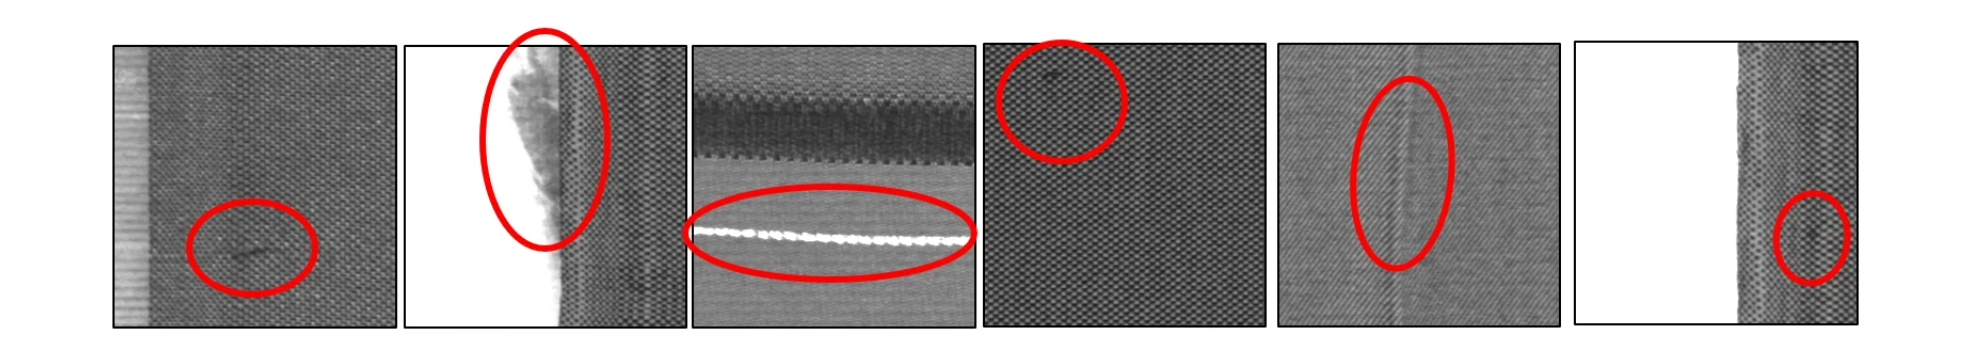

Multi-Scale Feature에 대한 고려 
1. 작은 Defect
2. 큰 Defect